# Import Library yang dibutuhkan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [4]:
df = pd.read_csv('predic_tabel.csv')

In [5]:
df.head()

,No,Usia,Jenis_Kelamin,Merokok,Bekerja,Rumah_Tangga,Aktivitas_Begadang,Aktivitas_Olahraga,Asuransi,Penyakit_Bawaan,Hasil
0,1,Tua,Pria,Pasif,Tidak,Ya,Ya,Sering,Ada,Tidak,Ya
1,2,Tua,Pria,Aktif,Tidak,Ya,Ya,Jarang,Ada,Ada,Tidak
2,3,Muda,Pria,Aktif,Tidak,Ya,Ya,Jarang,Ada,Tidak,Tidak
3,4,Tua,Pria,Aktif,Ya,Tidak,Tidak,Jarang,Ada,Ada,Tidak
4,5,Muda,Wanita,Pasif,Ya,Tidak,Tidak,Sering,Tidak,Ada,Ya


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   No                  30000 non-null  int64 
 1   Usia                30000 non-null  object
 2   Jenis_Kelamin       30000 non-null  object
 3   Merokok             30000 non-null  object
 4   Bekerja             30000 non-null  object
 5   Rumah_Tangga        30000 non-null  object
 6   Aktivitas_Begadang  30000 non-null  object
 7   Aktivitas_Olahraga  30000 non-null  object
 8   Asuransi            30000 non-null  object
 9   Penyakit_Bawaan     30000 non-null  object
 10  Hasil               30000 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.5+ MB


In [7]:
df.describe()

,No
count,30000.000000
mean,15000.500000
std,8660.398374
min,1.000000
25%,7500.750000
50%,15000.500000
75%,22500.250000
max,30000.000000


In [8]:
df.isnull().sum()

No                    0
Usia                  0
Jenis_Kelamin         0
Merokok               0
Bekerja               0
Rumah_Tangga          0
Aktivitas_Begadang    0
Aktivitas_Olahraga    0
Asuransi              0
Penyakit_Bawaan       0
Hasil                 0
dtype: int64

In [9]:
col_names = ['Usia', 'Jenis_Kelamin', 'Merokok', 'Bekerja', 'Rumah_Tangga', 'Aktivitas_Begadang', 'Aktivitas_Olahraga', 'Asuransi', 'Penyakit_Bawaan', 'Hasil']

for col in col_names:
    print (df[col].value_counts())

Usia
Muda    15383
Tua     14617
Name: count, dtype: int64
Jenis_Kelamin
Wanita    22225
Pria       7775
Name: count, dtype: int64
Merokok
Aktif    15210
Pasif    14790
Name: count, dtype: int64
Bekerja
Ya       18964
Tidak    11036
Name: count, dtype: int64
Rumah_Tangga
Ya       15425
Tidak    14575
Name: count, dtype: int64
Aktivitas_Begadang
Ya       17548
Tidak    12452
Name: count, dtype: int64
Aktivitas_Olahraga
Jarang    17994
Sering    12006
Name: count, dtype: int64
Asuransi
Ada      21239
Tidak     8761
Name: count, dtype: int64
Penyakit_Bawaan
Ada      19350
Tidak    10650
Name: count, dtype: int64
Hasil
Tidak    15648
Ya       14352
Name: count, dtype: int64


## Transformasi Dataset

In [10]:
numerical = []
catgcols =[]

for col in df.columns:
  if df[col].dtype=="float64":
    numerical.append(col)
  else:
    catgcols.append(col)

for col in df.columns:
  if col in numerical:
    df[col].fillna(df[col].median(), inplace=True)
  else:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_14604\825521696.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [11]:
numerical

[]

In [12]:
catgcols

['No',
 'Usia',
 'Jenis_Kelamin',
 'Merokok',
 'Bekerja',
 'Rumah_Tangga',
 'Aktivitas_Begadang',
 'Aktivitas_Olahraga',
 'Asuransi',
 'Penyakit_Bawaan',
 'Hasil']

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in catgcols:
    df[col] = le.fit_transform(df[col])

In [14]:
df.head()

,No,Usia,Jenis_Kelamin,Merokok,Bekerja,Rumah_Tangga,Aktivitas_Begadang,Aktivitas_Olahraga,Asuransi,Penyakit_Bawaan,Hasil
0,0,1,0,1,0,1,1,1,0,1,1
1,1,1,0,0,0,1,1,0,0,0,0
2,2,0,0,0,0,1,1,0,0,1,0
3,3,1,0,0,1,0,0,0,0,0,0
4,4,0,1,1,1,0,0,1,1,0,1


# EDA

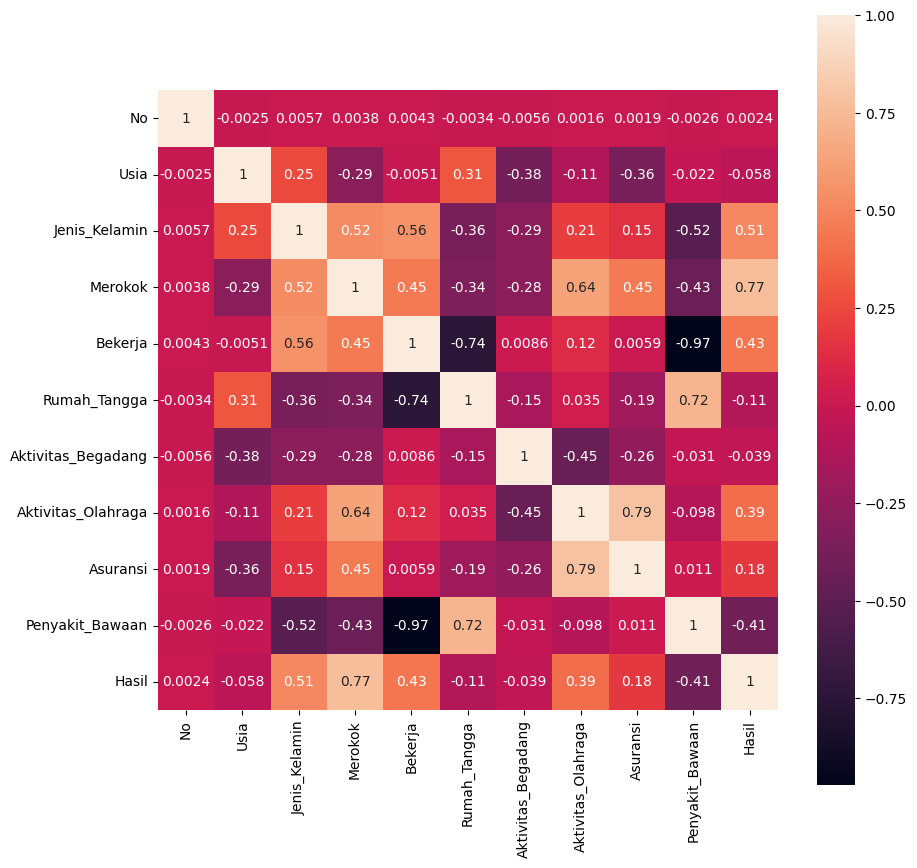

In [15]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, square=True ,ax=ax)
plt.yticks(rotation=360)
plt.show()

<Axes: >

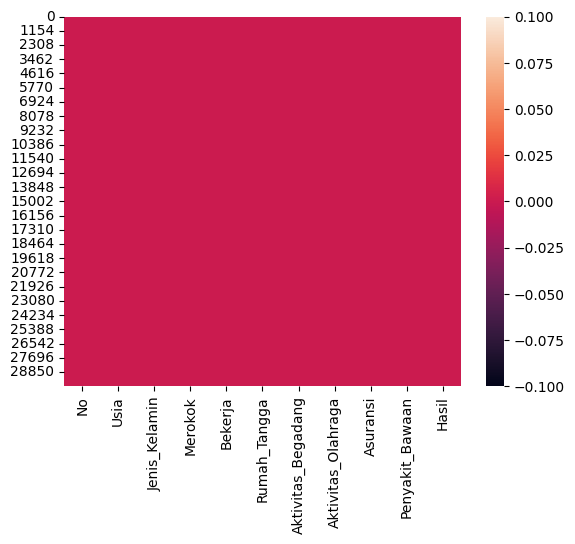

In [16]:
sns.heatmap(df.isnull())

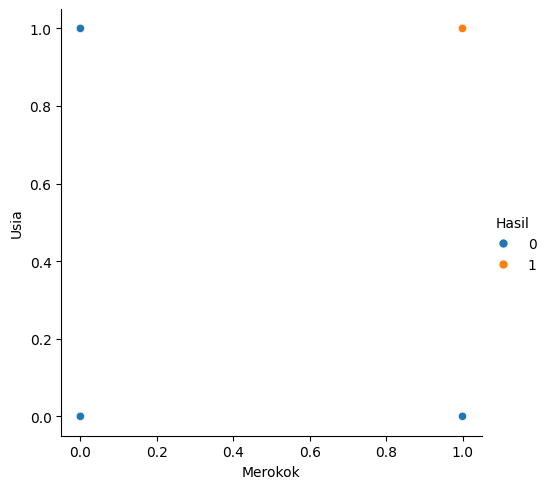

In [17]:
sns.relplot(x='Merokok', y='Usia', hue='Hasil', data=df);

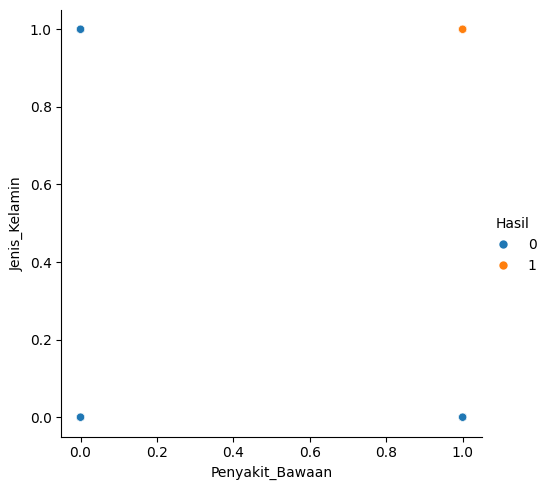

In [18]:
sns.relplot(x='Penyakit_Bawaan', y='Jenis_Kelamin', hue='Hasil', data=df);

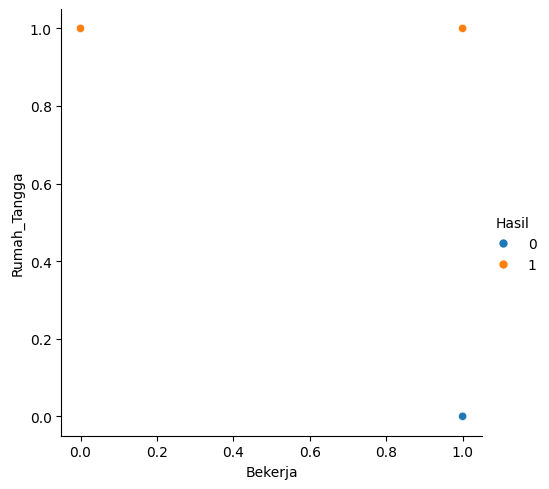

In [19]:
sns.relplot(x='Bekerja', y='Rumah_Tangga', hue='Hasil', data=df);

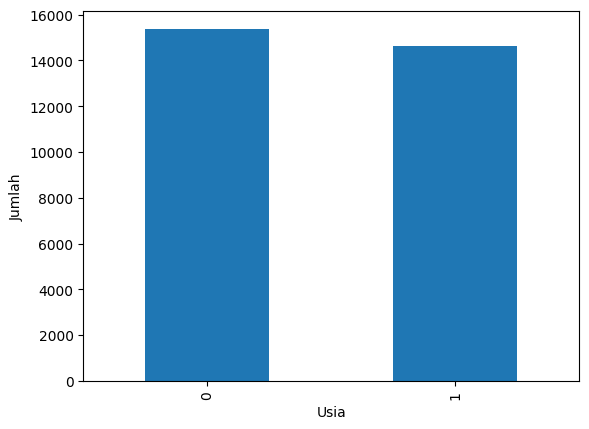

In [20]:
df.Usia.value_counts().plot(kind='bar')
plt.xlabel("Usia")
plt.ylabel("Jumlah")
plt.show()

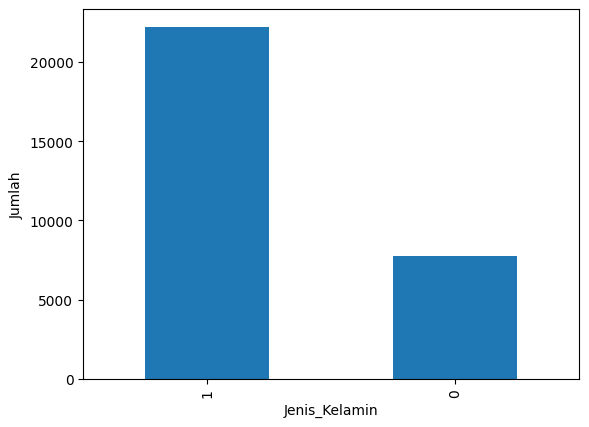

In [21]:
df.Jenis_Kelamin.value_counts().plot(kind='bar')
plt.xlabel("Jenis_Kelamin")
plt.ylabel("Jumlah")
plt.show()

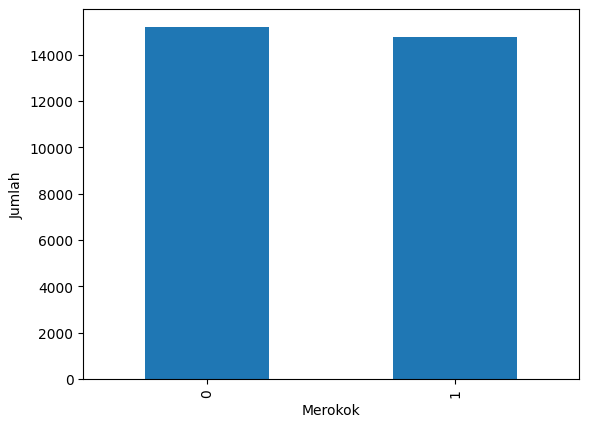

In [22]:
df.Merokok.value_counts().plot(kind='bar')
plt.xlabel("Merokok")
plt.ylabel("Jumlah")
plt.show()

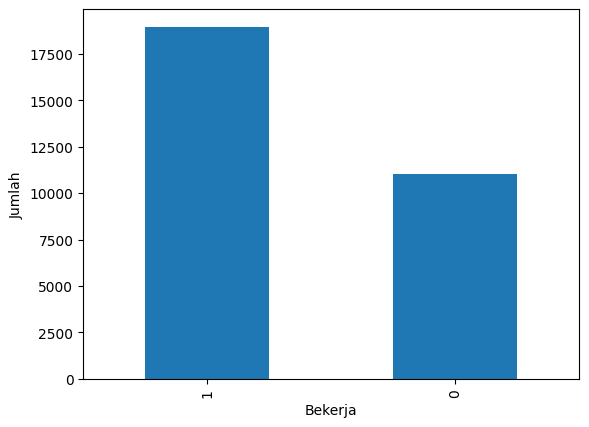

In [23]:
df.Bekerja.value_counts().plot(kind='bar')
plt.xlabel("Bekerja")
plt.ylabel("Jumlah")
plt.show()

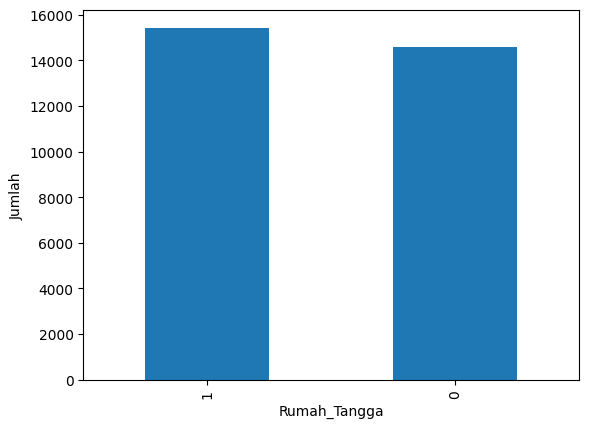

In [24]:
df.Rumah_Tangga.value_counts().plot(kind='bar')
plt.xlabel("Rumah_Tangga")
plt.ylabel("Jumlah")
plt.show()

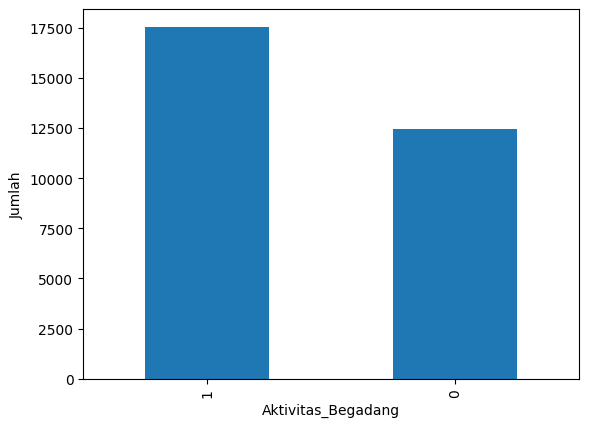

In [25]:
df.Aktivitas_Begadang.value_counts().plot(kind='bar')
plt.xlabel("Aktivitas_Begadang")
plt.ylabel("Jumlah")
plt.show()

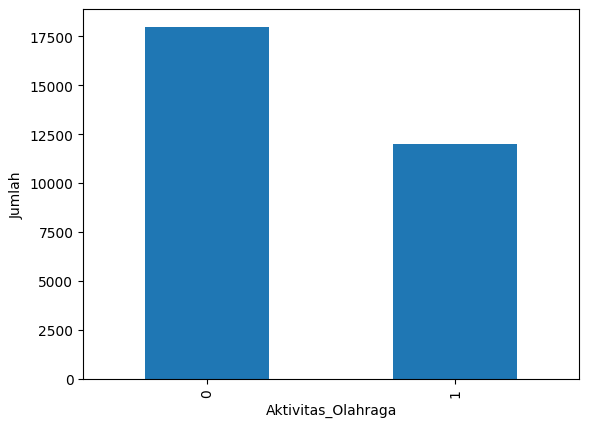

In [26]:
df.Aktivitas_Olahraga.value_counts().plot(kind='bar')
plt.xlabel("Aktivitas_Olahraga")
plt.ylabel("Jumlah")
plt.show()

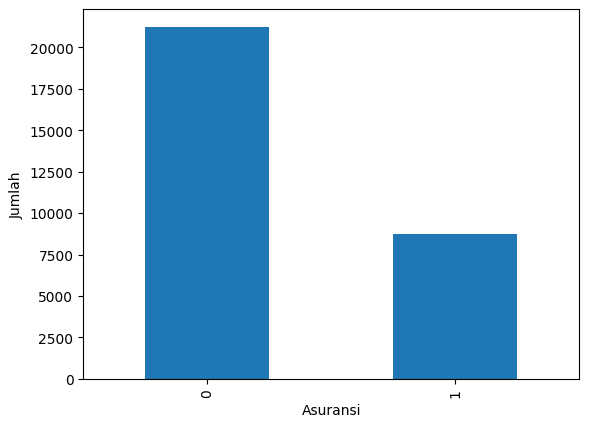

In [27]:
df.Asuransi.value_counts().plot(kind='bar')
plt.xlabel("Asuransi")
plt.ylabel("Jumlah")
plt.show()

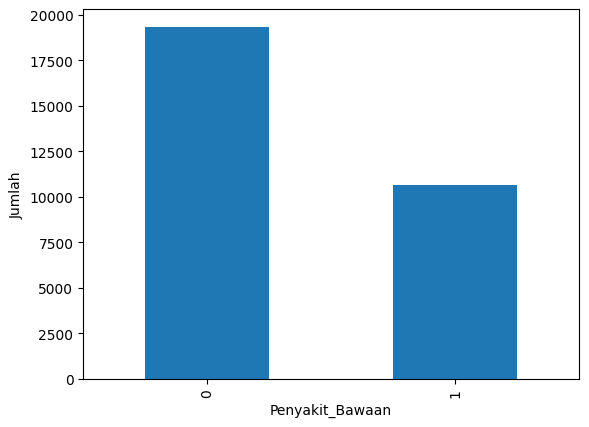

In [28]:
df.Penyakit_Bawaan.value_counts().plot(kind='bar')
plt.xlabel("Penyakit_Bawaan")
plt.ylabel("Jumlah")
plt.show()

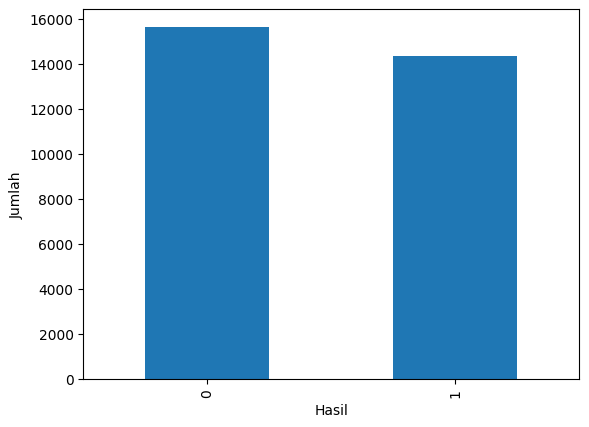

In [29]:
df.Hasil.value_counts().plot(kind='bar')
plt.xlabel("Hasil")
plt.ylabel("Jumlah")
plt.show()

# Data Preparation

In [30]:
df.drop(['No'], axis=1)

,Usia,Jenis_Kelamin,Merokok,Bekerja,Rumah_Tangga,Aktivitas_Begadang,Aktivitas_Olahraga,Asuransi,Penyakit_Bawaan,Hasil
0,1,0,1,0,1,1,1,0,1,1
1,1,0,0,0,1,1,0,0,0,0
2,0,0,0,0,1,1,0,0,1,0
3,1,0,0,1,0,0,0,0,0,0
4,0,1,1,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,1,1,0,0,1,0
29996,1,1,0,1,0,1,0,0,0,0
29997,1,1,0,1,0,1,0,0,0,0
29998,0,1,1,1,0,0,1,1,0,0


In [31]:
df.to_csv('Penyakit_Paru.csv',index=False)

In [32]:
ind_col = [col for col in df.columns if col != 'Hasil']
dep_col = 'Hasil'

In [33]:
x = df[ind_col] #feature
y = df[dep_col] #label

# Modeling

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"akurasi data testing = {dtc_acc} \n")

print(f"confusin matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test,dtc.predict(x_test))
tn, fp, fn, tp =confusion.ravel()
print(f"classification report : \n {classification_report(y_test, dtc.predict(x_test))}")

akurasi data training = 0.9471666666666667
akurasi data testing = 0.9443333333333334 

confusin matrix : 
[[3180    0]
 [ 334 2486]]

classification report : 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      3180
           1       1.00      0.88      0.94      2820

    accuracy                           0.94      6000
   macro avg       0.95      0.94      0.94      6000
weighted avg       0.95      0.94      0.94      6000



## Simulasi Model

In [36]:
input_data = (1,0,1,0,1,1,1,0,1,1)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

if(prediction[0] ==0):
  print ('Pasien tidak terkena penyakit paru-paru')
else:
  print ('Pasien terkena penyakit paru-paru')

[1]
Pasien terkena penyakit paru-paru


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Visualisasi hasil modeling

In [37]:
from sklearn import tree

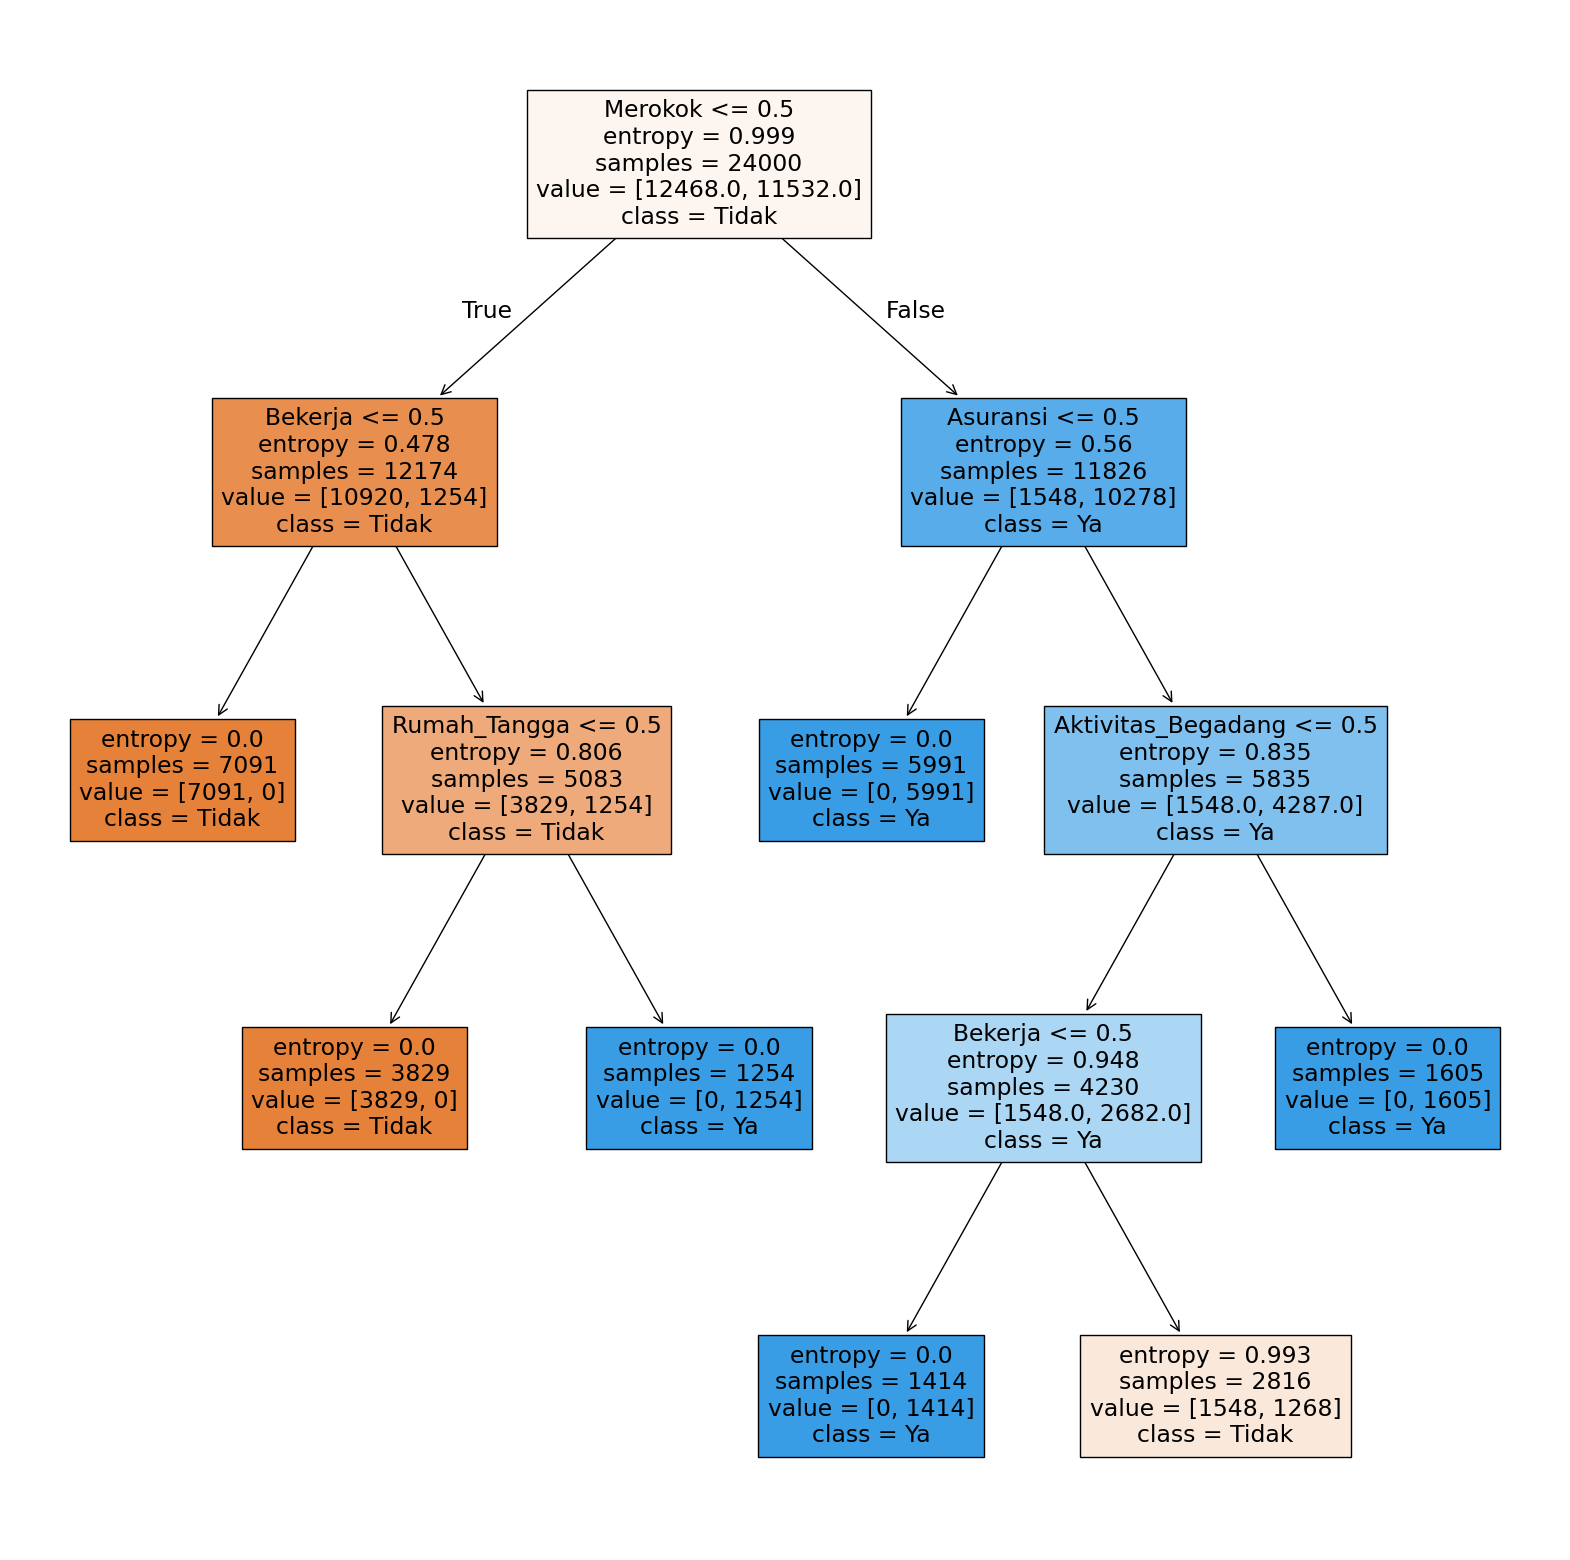

In [38]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,20))
_= tree.plot_tree(model,
                  feature_names=ind_col,
                  class_names=['Tidak','Ya'],
                  filled=True)

# Simpan model (Pickle)

In [39]:
import pickle
filename = "Hasil_PenyakitParu.sav"
pickle.dump(model, open(filename, 'wb'))